# Modules

In [1]:

import pandas as pd
import numpy as np
import numpy.random as npr 
import matplotlib.pyplot as plt
from tqdm import tqdm



from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


from sklearn.datasets import make_classification

from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

# Création d'un dataset pour de la régression

In [149]:
K = 2
# Créez un ensemble de données avec 1000 échantillons, 20 caractéristiques 
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, random_state=0)
# n_informative : nombre de caractéristiques informatives, celles qui sont réellement utiles pour prédire la classe cible.
# n_redundant : nombre de caractéristiques redondantes générées comme des combinaisons linéaires des caractéristiques informatives.

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

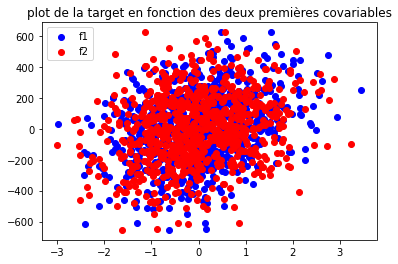

In [28]:
plt.scatter(X_train[:,0],Y_train,c='b',label='f1')
plt.scatter(X_train[:,1],Y_train,c='r',label='f2')
plt.title("plot de la target en fonction des deux premières covariables")
plt.legend()

$$\Psi(z, y)= \dfrac{(z-y)^2}{2} $$

Soit $F\in\mathcal{Lin(F)}$, où $\mathcal{F}$ est l'ensemble des arbres de descision de profondeur p et $\mathcal{Lin(F)}$ est l'ensemble des combinaisons linéaires d'éléments de $\mathcal{F}$. 

$$C(F) = E[\Psi(F(X),Y)]  = ""C_n(F) = \dfrac{1}{n}\sum_{i=1}^n\Psi(F(X_i),Y_i)"" $$

## Initialisation

In [150]:
# Initialisation du modèle de base - un arbre de régression simple - 
base_model = DecisionTreeRegressor(max_depth=1)

# Entraînement du modèle de base sur l'ensemble d'entraînement
base_model.fit(X_train, Y_train)

# Utilisation du modèle de base pour faire des prédictions initiales
predictions_train = base_model.predict(X_train)
predictions_test = base_model.predict(X_test)

print('mean_squared_error = ' , mean_squared_error(Y_train, predictions_train) )
print('mean_squared_error = ' , mean_squared_error(Y_test,predictions_test) )

mean_squared_error =  44273.48336116377
mean_squared_error =  41354.06772266658


## Boucle d'apprentissage

In [151]:
T_estimators = 100 # Nombre d'itérations
learning_rate = 0.1# Taux d'apprentissage

models = {'f0':base_model}
current_residuals = np.copy(Y_train) 

MSE_train = [mean_squared_error(Y_train, predictions_train)]
MSE_test = [mean_squared_error(Y_test,predictions_test)]


for t in range(T_estimators):

    # a. Calcul des current_résidus
    current_residuals -= learning_rate *  models[f'f{t}'].predict(X_train)

    # b. Entraînement du modèle f_(t+1) de base sur les résidus au temps t 
    models[f'f{t+1}'] = DecisionTreeRegressor(max_depth=1)
    models[f'f{t+1}'].fit(X_train, current_residuals)

    # c. Mise à jour des prédictions
    predictions_train += learning_rate*models[f'f{t+1}'].predict(X_train)
    predictions_test += learning_rate*models[f'f{t+1}'].predict(X_test)

    # d. stockage des erreurs 
    MSE_train.append(mean_squared_error(Y_train, predictions_train) )
    MSE_test.append(mean_squared_error(Y_test,predictions_test) )

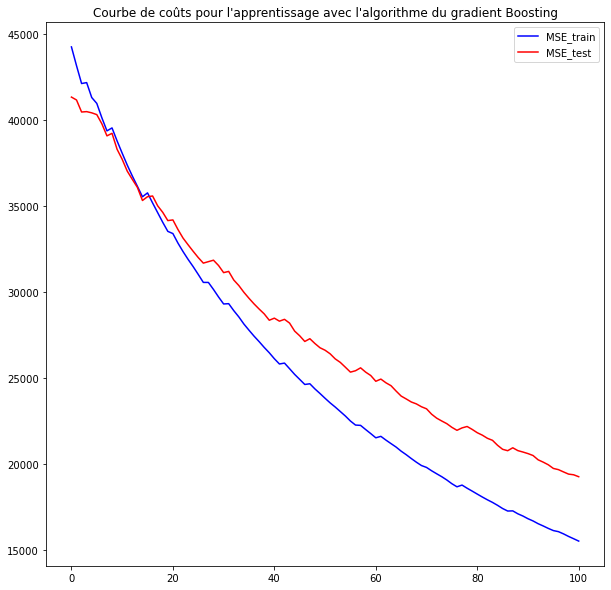

In [153]:
plt.figure(figsize=(10,10))
plt.plot(MSE_train,label='MSE_train',c='b')
plt.plot(MSE_test,label='MSE_test',c='r')
plt.title("Courbe de coûts pour l'apprentissage avec l'algorithme du gradient Boosting")
plt.legend()


## Généralisation avec une fonction "gradient_boosting_regressor"

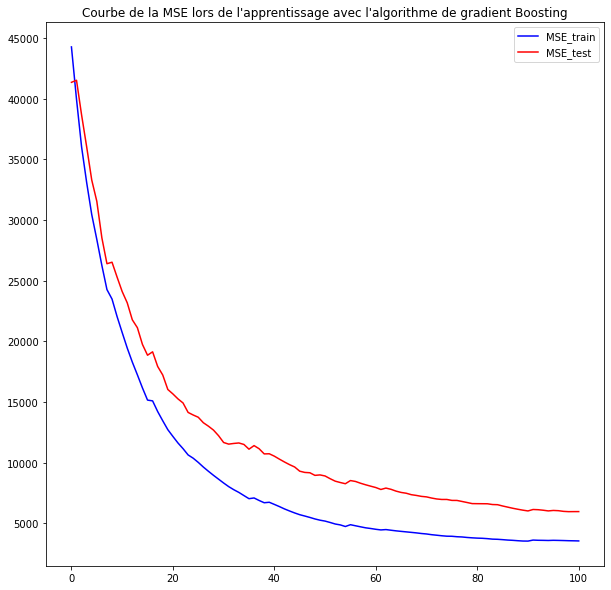

In [163]:
def gradient_boosting_regressor(X_train,X_test,Y_train,Y_test,max_depth=1,learning_rate=0.1,T_estimators = 100,display=True):

    # 1. Initialisation
    
    ## 1.a. modèle de base - un arbre de régression simple  de profondeur max_depth - 
    base_model = DecisionTreeRegressor(max_depth=max_depth)
    ## 1.b. Entraînement du modèle de base sur l'ensemble d'entraînement
    base_model.fit(X_train, Y_train)
    ## 1.c. Utilisation du modèle de base pour faire des prédictions initiales
    predictions_train = base_model.predict(X_train)
    predictions_test = base_model.predict(X_test)

    ## 1.d. Pour stocker les modèles à chaque étape
    models = {'f0':base_model}

    ## 1.e. Y_train à l'instant 0 peut être vu comme le résidu
    current_residuals = np.copy(Y_train) ###/len(Y_train)

    ## Pour stocker les métriques et les résidus à chaque étape
    MSE_train = [mean_squared_error(Y_train, predictions_train)]
    MSE_test = [mean_squared_error(Y_test,predictions_test)]
    Res = [np.linalg.norm(Y_train)]


    # 2. Ittération pour T étapes

    for t in range(T_estimators):

        # 2.a. Calcul des current_résidus
        current_residuals -= learning_rate*  models[f'f{t}'].predict(X_train) ###/len(Y_train) 
        Res.append(np.linalg.norm(current_residuals) )

        # b. Entraînement du modèle f_(t+1) de base sur les résidus au temps t 
        models[f'f{t+1}'] = DecisionTreeRegressor(max_depth=max_depth)
        models[f'f{t+1}'].fit(X_train, current_residuals)

        # c. Mise à jour des prédictions
        predictions_train += learning_rate*models[f'f{t+1}'].predict(X_train)
        predictions_test += learning_rate*models[f'f{t+1}'].predict(X_test)

        # d. stockage des erreurs et des residus  
        MSE_train.append(mean_squared_error(Y_train, predictions_train) )
        MSE_test.append(mean_squared_error(Y_test,predictions_test) )
    
    if display:
        plt.figure(figsize=(10,10))
        plt.plot(MSE_train,label='MSE_train',c='b')
        plt.plot(MSE_test,label='MSE_test',c='r')
        plt.title("Courbe de la MSE lors de l'apprentissage avec l'algorithme de gradient Boosting")
        plt.legend()
        plt.show()

        """plt.figure(figsize=(10,10))
        plt.plot(Res,label='||Res||',c='black')
        plt.title("Courbe de la norme des Résidus avec l'algorithme de gradient Boosting")
        plt.legend()
        plt.show()"""
        
    return predictions_train, predictions_test, MSE_train, MSE_test, Res


predictions_train, predictions_test, MSE_train, MSE_test, Res = gradient_boosting_regressor(X_train,X_test,Y_train,Y_test,max_depth=1,learning_rate=0.5,T_estimators = 100,display=True)
    

In [164]:
print("MSE_train " ,MSE_train[-1] )
print("MSE_test" ,MSE_test[-1] )

MSE_train  3558.547296967823
MSE_test 5976.626040676895


## Vérification avec les fonctions de sklearn

In [165]:
from sklearn.ensemble import GradientBoostingRegressor


# Paramètres pour Gradient Boosting
max_depth = 1
n_estimators = 100
learning_rate = 0.5

# Création et entraînement du modèle de Gradient Boosting
gb_reg = GradientBoostingRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_reg.fit(X_train, Y_train)

# Prédiction sur le jeu de données test
Y_pred_train = gb_reg.predict(X_train)
Y_pred_test = gb_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)

print("MSE_train " ,mse_train )
print("MSE_test" ,mse_test )

MSE_train  1610.8873540109842
MSE_test 3986.382838753646


# Classification binaire avec l'algarithme Adaboost

## Création des données 

In [194]:
X, Y  = make_classification(n_samples=2000, n_features=20, n_informative=15, n_redundant=5, n_classes=2,random_state=0)
Y[Y==0] = -1
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

Text(0.5, 1.0, 'plot des deux premières covariables avec indicateur cible en couleur')

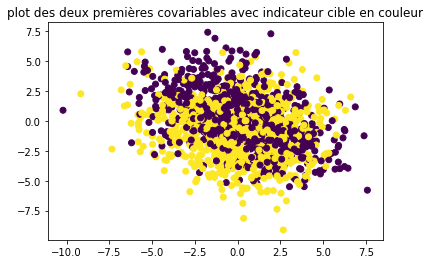

In [195]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.title("plot des deux premières covariables avec indicateur cible en couleur")


# Initialisation du modèle. 


In [196]:
def F_predictor(f,a,X):
    """Cette fonction permet de donner la prédiction de X pour F comme combinaison linéaire de modèles faible"""
    Y = np.zeros(X.shape[0])
    for k in a.keys():
        if k != '0':
            Y+= a[k]*f[k].predict(X)
    return np.where( Y < 0, -1, 1)

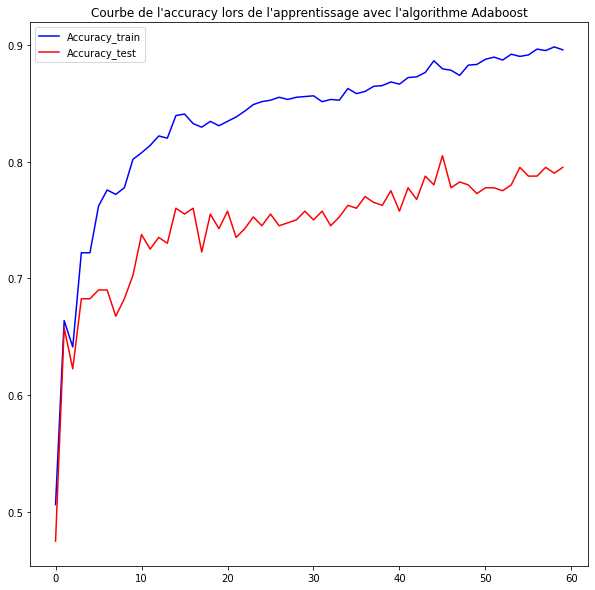

In [197]:
def adaboost(X_train,X_test,Y_train,Y_test,T=100,max_depth=1,criterion='gini',display=True):

    # A. Initialisation des poids,du premier model, des premières erreurs et des coefficients 
    W = {"0":np.ones(len(Y_train))/len(Y_train)}
    f = {"0": DecisionTreeClassifier(max_depth=max_depth,criterion=criterion).fit(X_train, Y_train,sample_weight=W["0"])} 
    err = {"0": ((f["0"].predict(X_train)!=Y_train)*W["0"]).sum()/W["0"].sum()}
    a = {"0": np.log((1- err["0"])/err["0"]) }

    # B. Affectation des nouveaux poids pour trouver f1 à l'étape suivante
    W["1"] = W["0"]*np.exp(a["0"]*(f["0"].predict(X_train)!=Y_train) ) 

    # C. Stocker les erreurs de prédiction 
    ACC_train = []
    ACC_test = []


    for t in range(1,T+1):

        # 1. Évaluation du modèle au temps t-1 et stockage des métriques
        ACC_train.append(accuracy_score(Y_train,F_predictor(f,a,X_train) ) )
        ACC_test.append(accuracy_score(Y_test,F_predictor(f,a,X_test) ) )

        # 2. On trouve f_t en fitant avec les poids au temps t
        f[f"{t}"] = DecisionTreeClassifier(max_depth=max_depth,criterion=criterion).fit(X_train, Y_train,sample_weight=W[f"{t}"])

        # 3. On trouve l'erreur au temps t 
        err[f"{t}"] = ((f[f"{t}"].predict(X_train)!=Y_train)*W[f"{t}"]).sum()/W[f"{t}"].sum()

        # 4. on définit le coefficient de pondération au temps t 
        a[f"{t}"] = np.log((1- err[f"{t}"])/err[f"{t}"])
                           
        # 5. /!\ On change les poids pour le temps t+1 
        W[f"{t+1}"] = W[f"{t}"]*np.exp(a[f"{t}"]*(f[f"{t}"].predict(X_train)!=Y_train) )
  

    if display:
        plt.figure(figsize=(10,10))
        plt.plot(ACC_train,label='Accuracy_train',c='b')
        plt.plot(ACC_test,label='Accuracy_test',c='r')
        plt.title("Courbe de l'accuracy lors de l'apprentissage avec l'algorithme Adaboost")
        plt.legend()
        plt.show()

        
    return W,f,err,a
    

W,f,err,a = adaboost(X_train,X_test,Y_train,Y_test,T=60,max_depth=2,criterion='gini',display=True)


In [198]:
print("accuracy_score_train = ",accuracy_score(Y_train,F_predictor(f,a,X_train) ))
print("accuracy_score_test = ",accuracy_score(Y_test,F_predictor(f,a,X_test) ))


accuracy_score_train =  0.894375
accuracy_score_test =  0.795


## Vérification avec les fonction de Sklearn

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

# Paramètres pour Gradient Boosting
max_depth = 2
n_estimators = 60

# Création et entraînement du modèle de Gradient Boosting
gb_reg = GradientBoostingClassifier(max_depth=max_depth, n_estimators=n_estimators)

gb_reg.fit(X_train, Y_train)

# Prédiction sur le jeu de données test
Y_pred_train = gb_reg.predict(X_train)
Y_pred_test = gb_reg.predict(X_test)

# Calcul de l'erreur quadratique moyenne (MSE)
accuracy_score_train = accuracy_score(Y_train, Y_pred_train)
accuracy_score_test = accuracy_score(Y_test, Y_pred_test)

print("accuracy_score_train " ,accuracy_score_train )
print("accuracy_score_test" ,accuracy_score_test )

accuracy_score_train  0.85375
accuracy_score_test 0.7775


Coût Logit :

$$loss\_reg\_log(z, y)= \dfrac{1}{n}\sum_{i=1}^n \log(1 + \exp(-y_i \times z_i))$$

$$\nabla loss\_reg\_log(z, y)_j= \dfrac{1}{n}\times  \dfrac{-y_j \times \exp(-y_j \times z_j)}{1 + \exp(-y_j \times z_j)}$$

Coût Adaboost :

$$loss\_adaboost(z, y)= \dfrac{1}{n}\sum_{i=1}^n \exp(-y_i \times z_i)$$

$$\nabla loss\_adaboost(z, y)_j= \dfrac{1}{n}\times -y_i \times \exp(-y_i \times z_i) $$


# Algorithme de boosting avec de la classification multi classe

## Création des données 

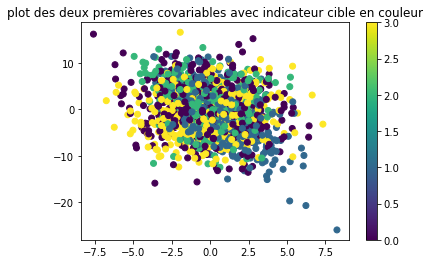

In [211]:
K = 4
X, Y  = make_classification(n_samples=2000, n_features=20, n_informative=15, n_redundant=5, n_classes=K,random_state=0)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.title("plot des deux premières covariables avec indicateur cible en couleur")
plt.colorbar()


# Gradient boosting multiclasses

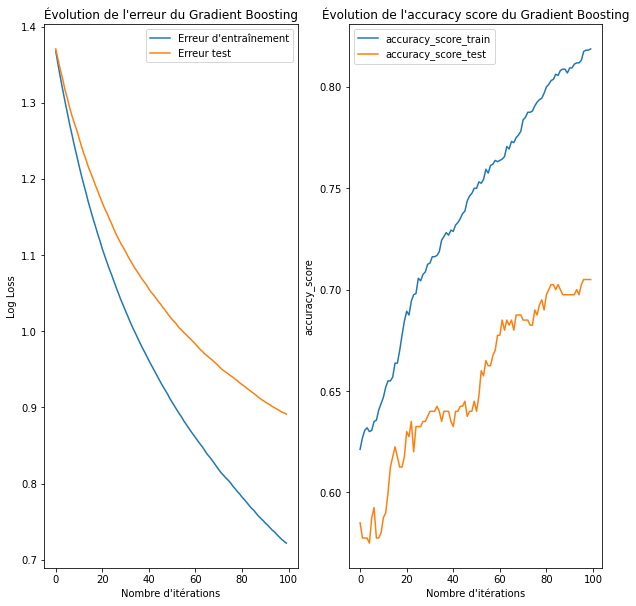

In [229]:
from sklearn.metrics import log_loss

def gradient_boosting_multiclass(X_train, Y_train, X_test, Y_test, n_estimators, learning_rate=0.1,max_depth=3,display=True):

    # A. initialisation 
    ## Avoir le nombre de classes
    K = len(np.unique(Y_train))
    ## les dimension train et test
    n_samples = X_train.shape[0]
    n_samples_test = X_test.shape[0]
    
    # B. Initialisation des prédictions
    f = np.zeros((n_samples, K))
    f_test = np.zeros((n_samples_test, K))

    # C. Convertir les étiquettes en format one-hot
    y_one_hot = np.eye(K)[Y_train]

    # Erreurs d'entraînement et de test
    train_errors = []
    test_errors = []

    accuracy_score_train = []
    accuracy_score_test = []

    for i in range(n_estimators):
        trees = []

        # Calcul des résidus
        for k in range(K):
            gradient = y_one_hot[:, k] - np.exp(f[:, k]) / np.sum(np.exp(f), axis=1)
            tree = DecisionTreeRegressor(max_depth=max_depth)
            tree.fit(X_train, gradient)
            trees.append(tree)

            f[:, k] += learning_rate * tree.predict(X_train)
            f_test[:, k] += learning_rate * tree.predict(X_test)

        # Calcul de l'erreur (log_loss)
        softmax_f = np.exp(f) / np.expand_dims(np.sum(np.exp(f), axis=1), axis=-1)
        softmax_f_test = np.exp(f_test) / np.expand_dims(np.sum(np.exp(f_test), axis=1), axis=-1)
        train_errors.append(log_loss(Y_train, softmax_f))
        test_errors.append(log_loss(Y_test, softmax_f_test))

        # Stockage des accuracy
        accuracy_score_train.append(accuracy_score(softmax_f.argmax(axis=1),Y_train))
        accuracy_score_test.append(accuracy_score(softmax_f_test.argmax(axis=1),Y_test))

    if display:

        plt.figure(figsize=(10, 10))

        plt.subplot(1,2,1)
        plt.plot(train_errors, label='Erreur d\'entraînement')
        plt.plot(test_errors, label='Erreur test')
        plt.xlabel('Nombre d\'itérations')
        plt.ylabel('Log Loss')
        plt.title('Évolution de l\'erreur du Gradient Boosting')
        plt.legend()

        plt.subplot(1,2,2)
        plt.plot(accuracy_score_train, label='accuracy_score_train')
        plt.plot(accuracy_score_test, label='accuracy_score_test')
        plt.xlabel('Nombre d\'itérations')
        plt.ylabel('accuracy_score')
        plt.title('Évolution de l\'accuracy score du Gradient Boosting')
        plt.legend()

        plt.show()


    return trees, train_errors, test_errors,softmax_f,softmax_f_test,accuracy_score_train,accuracy_score_test

# Entraînement de l'algorithme
n_estimators = 100
learning_rate = 0.1
max_depth = 3


trees, train_errors, test_errors,softmax_f,softmax_f_test,accuracy_score_train,accuracy_score_test = gradient_boosting_multiclass(X_train, Y_train, X_test, Y_test, n_estimators, learning_rate,max_depth)